# A Monte Carlo method to generate samples from Gaussian distribution

References:
1. https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm
2. https://statweb.stanford.edu/~owen/mc/Ch-nonunifrng.pdf    

In [1]:
from __future__ import division
import numpy as np
import math
import numpy.random as npr
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [2]:
# model parameters
num_points = 10000
data_range = 5
mcSteps = 3000       # number of MC sweeps for calculation
mu = 0
sigma = 1.
# target normal distribution (mu=0, sigma=1)
def f(y):
    return np.exp(-0.5* y**2)/np.sqrt(2*math.pi)

In [3]:
f(0)

0.3989422804014327

In [5]:
# Choose c = 0.4 such that c > f(y) always
def mcmove(x, c=0.4):
    y = 2*data_range*npr.random(1)[0]-data_range
    u = npr.random(1)[0]
    if u < f(y)/c:
        return y
    else: 
        return x

In [6]:
from tqdm import tqdm_notebook

samples = []
x = 2*data_range*npr.random(1)[0]-data_range
while len(samples)< num_points: 
    y = mcmove(x)  # Monte Carlo moves                   
    if y != x:
        samples.append(y)
    else: 
        x = y           

In [10]:
def plot_result(sample_set):
    sample_set = np.sort(np.array(sample_set))
    bins = np.linspace(-data_range, data_range, 100)
    p_gen, _ = np.histogram(sample_set, bins, density=True)
    data = np.sort(npr.normal(mu, sigma, num_points))
    p_data, _ = np.histogram(data, bins, density=True)
    p_x = np.linspace(-data_range, data_range, len(p_gen))

    f, ax = plt.subplots(1)
    ax.set_ylim(0, max(1, np.max(p_gen)*2.0))
    ax.set_xlim(mu-data_range*1.0, mu+data_range*1.0)
    plt.plot(p_x, p_gen, label='MC data')
    plt.plot(p_x, p_data, label='Gaussian data')
    plt.title('Gaussian Approximation using MC')
    plt.xlabel('Data values')
    plt.ylabel('Probability density')
    plt.legend(loc=1)
    plt.grid(True)

In [8]:
len(samples)

10000

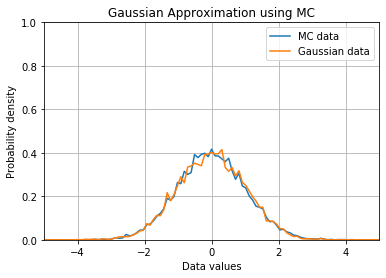

In [11]:
plot_result(samples)